# 모두의 딥러닝 개정 3판 
## 16장 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys  # python 제공, java system.out 같은 것
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape[0])   # 학습용 데이터셋의 이미지 수

60000


In [4]:
print(X_test.shape[0])    # 테스트용 데이터셋의 이미지 수

10000


In [21]:
print(X_train.shape)      # 이미지 수, 가로픽셀28, 세로픽셀28

(60000, 784)


In [6]:
print(X_test.shape) 

(10000, 28, 28)


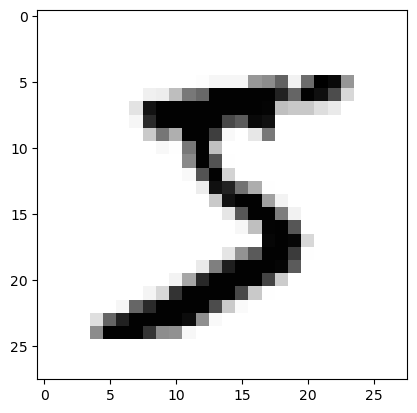

In [7]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [8]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i)  # 문자는 디폴트 왼쪽 정렬, %-3s오른쪽 정렬로 i를 출력해라
    sys.stdout.write('\n')  # 해당 row 다 차면 new line

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype(float) / 255
# reshape 2차원->1차원, astype 0~255 -> 0~1

In [10]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_train[0])

5


In [12]:
# 10개 중 1개를 맞추는 다중분류
# softmax, entropy 손실함수
# y_train numpy 배열을 one-hot 인코딩으로 만들기 위해 to_categorical 사용
# pandas 배열은 one-hot 인코딩으로 만들기 위해 get_dummies 사용
y_train = to_categorical(y_train)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
y_test = to_categorical(y_test)

In [14]:
model = models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 다중분류
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30,
                    batch_size=200, callbacks=[early_stop])

Epoch 1/30
225/225 [==============================] - 2s 6ms/step - loss: 0.3510 - accuracy: 0.9021 - val_loss: 0.1904 - val_accuracy: 0.9480
Epoch 2/30
225/225 [==============================] - 1s 4ms/step - loss: 0.1481 - accuracy: 0.9578 - val_loss: 0.1385 - val_accuracy: 0.9602
Epoch 3/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0983 - accuracy: 0.9721 - val_loss: 0.1123 - val_accuracy: 0.9669
Epoch 4/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0710 - accuracy: 0.9798 - val_loss: 0.0991 - val_accuracy: 0.9711
Epoch 5/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0530 - accuracy: 0.9850 - val_loss: 0.0893 - val_accuracy: 0.9727
Epoch 6/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9891 - val_loss: 0.0851 - val_accuracy: 0.9743
Epoch 7/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0313 - accuracy: 0.9918 - val_loss: 0.0856 - val_accuracy: 0.9736
Epoch 

In [19]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 1ms/step - loss: 0.0805 - accuracy: 0.9792
Test Accuracy: 0.9792


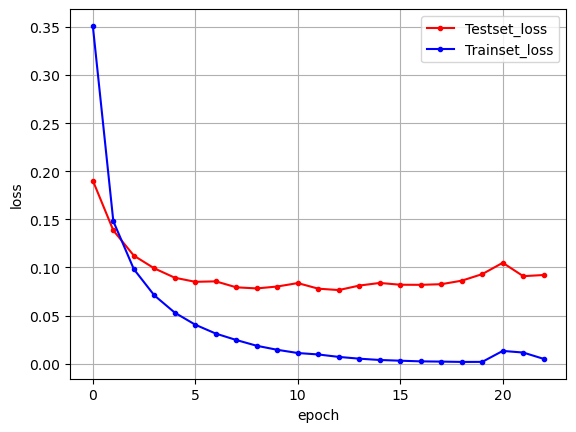

In [20]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()